<a href="https://colab.research.google.com/github/luizrenault/tp547/blob/main/estudo_caso/queuexor_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Estudo de Caso**

O nó relay (retransmissor) de uma rede de comunicação cooperativa possui uma fila com buffer com capacidade para armazenar N pacotes (incluindo o pacote que está em atendimento, ou seja, sendo transmitido pelo relay). Os pacotes recebidos pelo relay são colocados na fila e transmitidos da seguinte forma: se houver um único pacote na fila ele é transmitido imediatamente; se houver dois ou mais pacotes na fila, o relay faz uma operação ou-exclusivo (XOR) entre os dois pacotes, transmite o pacote resultante da operação XOR e retira os dois pacotes utilizados para fazer o XOR da fila. A taxa de chegada de pacotes na fila do relay é λ pacotes/segundo. O enlace de saída do nó relay permite a transmissão de μ pacotes/segundo.



In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros

lambda1=1 #chegadas/tempo - taxa media de chegada
mu1=0.8 #partidas/tempo - taxa media de partida
Nq=np.infty #tamanho da fila
TS=20000 #tempo máximo de simulação
xor = 2

def chegada():
  return np.random.exponential(1/lambda1)

def partida():
  #return 1/mu1
  return np.random.exponential(1/mu1)

def simulacao():

    # estatísticas de simulação
    t = 0 #tempo inicial
    lq = 0 #numero de usuários na fila
    ls = 0 #numero de usuários no servidor
    k1 = 0 #número de chegadas
    k2 = 0 #número de serviços
    k = 0 #numero de partidas
    b = 0 #numero de bloqueios


    tc = [] #tempo de chegadas
    tp = [] #tempo de partidas
    ts = [] #tempo no sistema
    kxor = [] #número de pacotes transmitidos

    ta = t + chegada() #proxima chegada
    td = np.infty #proxima partida
    t = np.minimum(ta, td) #proximo tempo de execucao

    while (t < TS): #tempo limite de simulacao
        if ta<td: #evento de chegada
            k1 = k1 + 1 #incrementa o número de chegadas
            if lq < Nq:
                lq = lq + 1 #aumenta a fila
                tc = np.append(tc, t) #aramazena tempo atual de chegada
                #print(f"Chegada  F({lq})S({ls})T({t})")
            else:
                b = b + 1 #incrementa o número de bloqueios
                #print(f"Bloqueio F({lq})S({ls})T({t})")
            ta = t + chegada() #gera nova chegada

        else: #evento de partida
            while ls > 0: #simula partida de pacotes
              k = k + 1 #incrementa o numero de partidas
              tp = np.append(tp, t) #armazeno o tempo da partida
              ts = np.append(ts, (tp[k - 1] - tc[k - 1])) #calculo o tempo no sistema
              ls = ls - 1

            td = np.infty #coloco um valor muito grande para a proxima partida
            #print(f"Partida  F({lq})S({ls})T({t})")

        if ls == 0 and lq > 0: #servidor desocupado e pacote na fila
            while lq > 0 and ls < xor: #simula XOR entre pacotes, tirando pacotes da fila
              lq = lq - 1 #remove pacote da fila
              k2 = k2 + 1 #incrementa o número de serviços
              ls = ls + 1 #ocupa o servidor

            kxor = np.append(kxor, ls)
            td = t + partida() #gera nova partida
            #print(f"Serviço  F({lq})S({ls})T({t})")

        t = np.minimum(ta, td) #calculo o tempo minimo entre chegada e partida
    tq=np.mean(ts)
    tw=tq-1/mu1
    rho=lambda1/mu1
    pb = b/k1
    eq=(1-pb)*lambda1*tq
    ew=(1-pb)*lambda1*tw

    #print(f"=================={rho}=================")
    #print(f"fator de utilizacao rho: {rho}")
    #print(f"tempo no sistema: {tq}")
    #print(f"tempo na fila: {tw}")
    #print(f"numero medio de usuários no sistema: {eq}")
    #print(f"numero medio de usuários na fila: {ew}")
    #print(f"probabilidade de bloqueios: {pb}")
    #print(f"bloqueios: {b}")
    #print(f"chegadas: {k1}")
    #print(f"fila: {lq}")
    #print(f"entrada sv: {k2}")
    #print(f"partidas: {k}")

    return rho, tq, tw, eq, ew, pb, Nq, np.mean(kxor)


In [75]:
#simulação

rhos = np.arange(0,2,0.01)

resultado = np.array([])

rhovec = np.array([])
tqvec = np.array([])
eqvec = np.array([])
pbvec = np.array([])
kxorvec = np.array([])

TS=20000 #tempo máximo de simulação
Nq=np.infty
xor=2

for thisrho in rhos:
    if thisrho == 0:
        continue
    mu1 = lambda1 / thisrho
    rho, tq, tw, eq, ew, pb, Nq, kxor = simulacao()
    rhovec = np.append(rhovec, rho)
    tqvec = np.append(tqvec, tq)
    eqvec = np.append(eqvec, eq)
    pbvec = np.append(pbvec, pb)
    kxorvec = np.append(kxorvec, kxor)




In [80]:
#probabilidade de bloqueio

pbvec_5 = np.array([])
pbvec_10 = np.array([])
pbvec_50 = np.array([])

eqvec_5 = np.array([])
eqvec_10 = np.array([])
eqvec_50 = np.array([])

TS=50000 #tempo máximo de simulação
xor=2

for thisrho in rhos:
    if thisrho == 0:
        continue
    mu1 = lambda1 / thisrho
    Nq=5
    rho, tq, tw, eq, ew, pb, Nq, kxor = simulacao()
    eqvec_5 = np.append(eqvec_5, eq)
    pbvec_5 = np.append(pbvec_5, pb)

    Nq=10
    rho, tq, tw, eq, ew, pb, Nq, kxor = simulacao()
    eqvec_10 = np.append(eqvec_10, eq)
    pbvec_10 = np.append(pbvec_10, pb)

    Nq=50
    rho, tq, tw, eq, ew, pb, Nq, kxor = simulacao()
    eqvec_50 = np.append(eqvec_50, eq)
    pbvec_50 = np.append(pbvec_50, pb)


In [67]:
#validação

rhomm1 = np.array([])
tqmm1 = np.array([])
eqmm1 = np.array([])
pbmm1 = np.array([])
kxormm1 = np.array([])

TS=50000 #tempo máximo de simulação
Nq=np.infty
xor=1

for thisrho in rhos:
    if thisrho == 0:
        continue
    mu1 = lambda1 / thisrho
    rho, tq, tw, eq, ew, pb, Nq, kxor = simulacao()
    rhomm1 = np.append(rhomm1, rho)
    tqmm1 = np.append(tqmm1, tq)
    eqmm1 = np.append(eqmm1, eq)
    pbmm1 = np.append(pbmm1, pb)
    kxormm1 = np.append(kxormm1, kxor)


In [68]:
#validação pb

pbmm1_5 = np.array([])

TS=50000 #tempo máximo de simulação
Nq=np.infty
xor=1
Nq=5

for thisrho in rhos:
    if thisrho == 0:
        continue
    mu1 = lambda1 / thisrho
    rho, tq, tw, eq, ew, pb, Nq, kxor = simulacao()
    pbmm1_5 = np.append(pbmm1_5, pb)


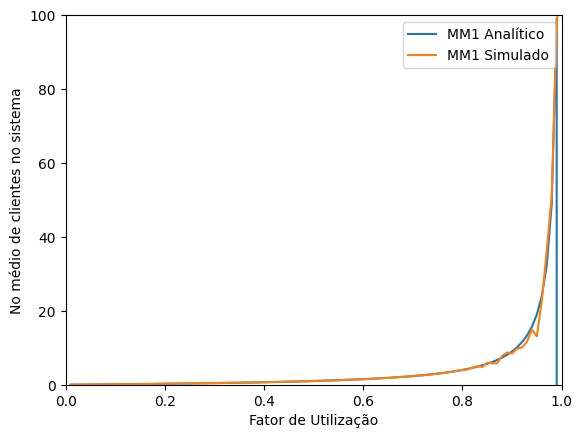

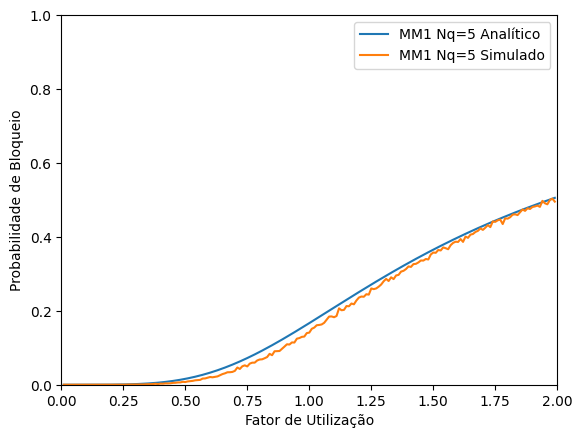

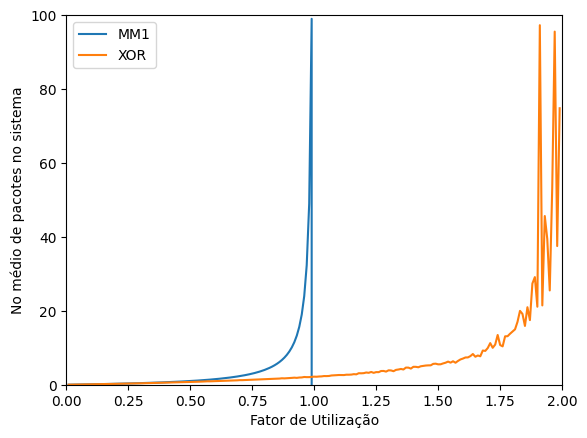

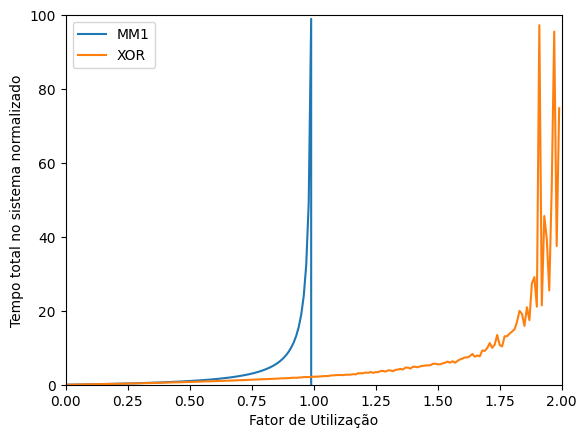

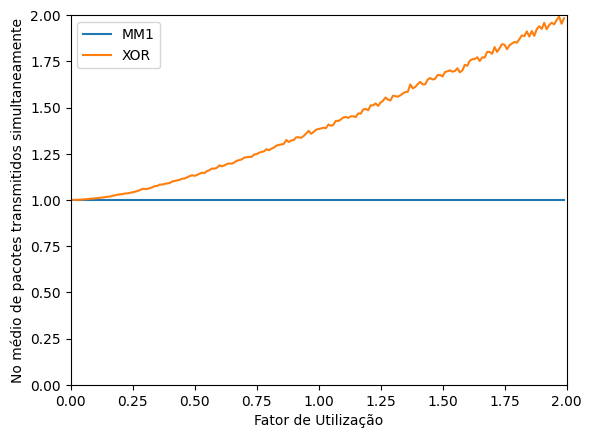

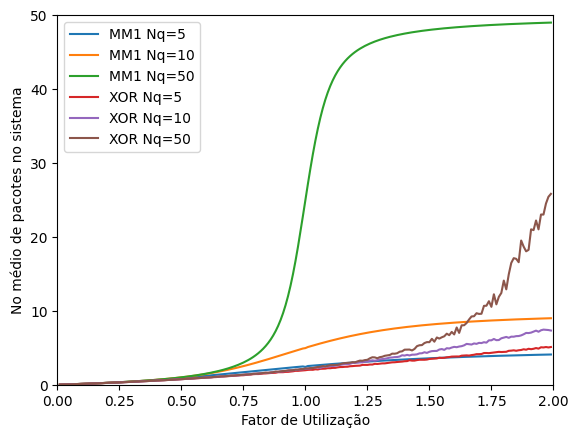

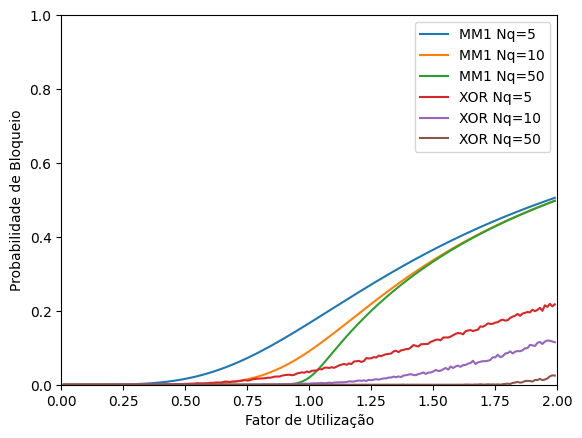

In [94]:
import matplotlib.pyplot as plt

rhovec1 = rhovec + 10e-9

eqmm1t = rhovec1 / (1-rhovec1)
tqmm1t = 1 / (lambda1 / rhovec1 - lambda1)
pbmm1_5t = (rhovec1**5) * (1-rhovec1) / (1-rhovec1**6)
pbmm1_10t = (rhovec1**10) * (1-rhovec1) / (1-rhovec1**11)
pbmm1_50t = (rhovec1**50) * (1-rhovec1) / (1-rhovec1**51)

eqmm1_5t = eqmm1t - 6 * rhovec1**6 / (1-rhovec1**6)
eqmm1_10t = eqmm1t - 11 * rhovec1**11 / (1-rhovec1**11)
eqmm1_50t = eqmm1t - 51 * rhovec1**51 / (1-rhovec1**51)

plt.figure()
plt.ylabel('No médio de clientes no sistema')
plt.xlabel('Fator de Utilização')
plt.plot(rhomm1, eqmm1t, label='MM1 Analítico')
plt.plot(rhovec, eqmm1, label='MM1 Simulado')
plt.xlim(0, 1)
plt.ylim(0,100)
plt.legend()
plt.show()

plt.figure()
plt.ylabel('Probabilidade de Bloqueio')
plt.xlabel('Fator de Utilização')
plt.plot(rhovec, pbmm1_5t, label='MM1 Nq=5 Analítico')
plt.plot(rhovec, pbmm1_5, label='MM1 Nq=5 Simulado')
plt.xlim(0, 2)
plt.ylim(0,1)
plt.legend()
plt.show()



plt.figure()
plt.ylabel('No médio de pacotes no sistema')
plt.xlabel('Fator de Utilização')
plt.plot(rhomm1, eqmm1t, label='MM1')
plt.plot(rhovec, eqvec, label='XOR')
plt.xlim(0, 2)
plt.ylim(0,100)
plt.legend()
plt.show()


plt.figure()
plt.ylabel('Tempo total no sistema normalizado')
plt.xlabel('Fator de Utilização')
plt.plot(rhomm1, tqmm1t, label='MM1')
plt.plot(rhovec, tqvec, label='XOR')
plt.xlim(0, 2)
plt.ylim(0,100)
plt.legend()
plt.show()

plt.figure()
plt.ylabel('No médio de pacotes transmitidos simultaneamente')
plt.xlabel('Fator de Utilização')
plt.plot(rhovec, np.ones(rhovec.size), label='MM1')
plt.plot(rhovec, kxorvec, label='XOR')
plt.xlim(0, 2)
plt.ylim(0,2)
plt.legend()
plt.show()

plt.figure()
plt.ylabel('No médio de pacotes no sistema')
plt.xlabel('Fator de Utilização')
plt.plot(rhovec, eqmm1_5t, label='MM1 Nq=5')
plt.plot(rhovec, eqmm1_10t, label='MM1 Nq=10')
plt.plot(rhovec, eqmm1_50t, label='MM1 Nq=50')
plt.plot(rhovec, eqvec_5, label='XOR Nq=5')
plt.plot(rhovec, eqvec_10, label='XOR Nq=10')
plt.plot(rhovec, eqvec_50, label='XOR Nq=50')
plt.xlim(0, 2)
plt.ylim(0,50)
plt.legend()
plt.show()


plt.figure()
plt.ylabel('Probabilidade de Bloqueio')
plt.xlabel('Fator de Utilização')
plt.plot(rhovec, pbmm1_5t, label='MM1 Nq=5')
plt.plot(rhovec, pbmm1_10t, label='MM1 Nq=10')
plt.plot(rhovec, pbmm1_50t, label='MM1 Nq=50')
plt.plot(rhovec, pbvec_5, label='XOR Nq=5')
plt.plot(rhovec, pbvec_10, label='XOR Nq=10')
plt.plot(rhovec, pbvec_50, label='XOR Nq=50')
plt.xlim(0, 2)
plt.ylim(0,1)
plt.legend()
plt.show()
